In [41]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [42]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target variable

In [43]:
# Define the range you want to scale to
min_value = 0
max_value = 1

In [44]:
# Normalize the features using MinMaxScaler
scaler = MinMaxScaler(feature_range=(min_value, max_value))
X_normalized = scaler.fit_transform(X)

In [72]:
# Divide the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.5, random_state=42)

In [73]:
# Initialize and train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [74]:
# Predict the labels for the test set
y_pred = knn.predict(X_test)

In [75]:
# Calculate the accuracy of the classifier
print("+++++++++++++++++++++++++++++")
print(y_test)
print("-----------------------------")
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

+++++++++++++++++++++++++++++
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1]
-----------------------------
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1]
Accuracy: 0.9866666666666667


In [76]:
#f-score, recall, precision
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
for i in range(len(precision)):
    print(f'precision{i}- {precision[i]}')
    print(f'recall{i}- {recall[i]}')
    print(f'f-score{i}- {fscore[i]}')
    

precision0- 1.0
recall0- 1.0
f-score0- 1.0
precision1- 0.9583333333333334
recall1- 1.0
f-score1- 0.9787234042553191
precision2- 1.0
recall2- 0.9565217391304348
f-score2- 0.9777777777777777


In [77]:
#confusion matrix computing
confusion_matrix(y_test,y_pred)

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

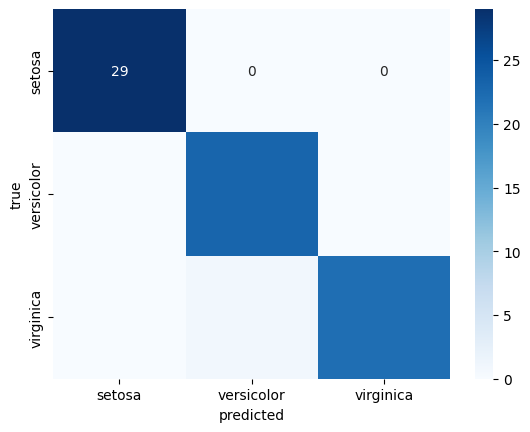

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
iris_cm= pd.DataFrame(confusion_matrix(y_test, y_pred),
                      index=['setosa', 'versicolor', 'virginica'],
                      columns=['setosa', 'versicolor', 'virginica'])
sns.heatmap(iris_cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.ylabel('true')
plt.xlabel('predicted')
plt.show